In [1]:
import tensorflow as tf
import os

In [2]:
print('Tensorflow Version: {}'.format(tf.__version__))

Tensorflow Version: 2.0.0-rc0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(train_image, train_lable), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
train_image.shape

(60000, 28, 28)

In [6]:
train_lable.shape

(60000,)

In [7]:
test_image.shape, test_label.shape

((10000, 28, 28), (10000,))

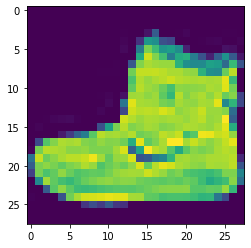

In [8]:
plt.imshow(train_image[0])

In [9]:
np.max(train_image[0])

255

In [10]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
train_image = train_image/255
test_image = test_image/255

In [12]:
train_image.shape

(60000, 28, 28)

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # 28*28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [16]:
model.fit(train_image, train_lable, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 82us/sample - loss: 0.5020 - acc: 0.8239
Epoch 2/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3754 - acc: 0.8650
Epoch 3/3
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3381 - acc: 0.8757


In [17]:
model.evaluate(test_image, test_label, verbose=0)

[0.3684553307771683, 0.8659]

# 保存整个模型

整个模型可以保存到一个文件中，其中包含权重值、模型配置乃至优化器配置。这样，您就可以为模型设置检查点，并稍后从完全相同的状态继续训练，而无需访问原始代码。

在 Keras 中保存完全可正常使用的模型非常有用，您可以在 TensorFlow.js 中加载它们，然后在网络浏览器中训练和运行它们。

Keras 使用 HDF5 标准提供基本的保存格式。

In [18]:
model.save('less_model.h5')

In [19]:
new_model = tf.keras.models.load_model('less_model.h5')

W0930 19:59:17.244999 13052 deprecation.py:323] From c:\users\guanghua\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
new_model.evaluate(test_image, test_label, verbose=0)

[0.3684553307771683, 0.8659]

此方法保存以下所有内容：

1.权重值
2.模型配置（架构）
3.优化器配置

# 仅保存架构

有时我们只对模型的架构感兴趣，而无需保存权重值或优化器。在这种情况下，可以仅保存模型的“配置” 。

In [25]:
json_config = model.to_json()

In [26]:
json_config

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Flatten", "config": {"name": "flatten", "trainable": true, "batch_input_shape": [null, 28, 28], "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 128, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": 

In [27]:
reinitialized_model = tf.keras.models.model_from_json(json_config)

In [28]:
reinitialized_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [30]:
reinitialized_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['acc']
)

In [31]:
reinitialized_model.evaluate(test_image, test_label, verbose=0)

[2.5259773368835448, 0.0712]

# 仅保存权重

有时我们只需要保存模型的状态（其权重值），而对模型架构不感兴趣。在这种情况下，可以通过get_weights()获取权重值，并通过set_weights()设置权重值

In [32]:
weighs = model.get_weights()

In [34]:
reinitialized_model.set_weights(weighs)

In [35]:
reinitialized_model.evaluate(test_image, test_label, verbose=0)

[0.3684553307771683, 0.8659]

In [36]:
model.save_weights('less_weights.h5')

In [37]:
reinitialized_model.load_weights('less_weights.h5')

In [38]:
reinitialized_model.evaluate(test_image, test_label, verbose=0)

[0.3684553307771683, 0.8659]

# 在训练期间保存检查点

在训练期间或训练结束时自动保存检查点。这样一来，您便可以使用经过训练的模型，而无需重新训练该模型，或从上次暂停的地方继续训练，以防训练过程中断。

回调函数：tf.keras.callbacks.ModelCheckpoint

In [18]:
checkpoint_path = 'training_cp/cp.ckpt'

In [19]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 save_weights_only=True)

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # 28*28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
)

In [16]:
model.evaluate(test_image, test_label, verbose=0)

[2.4373130966186523, 0.0964]

In [20]:
model.load_weights(checkpoint_path)

In [21]:
model.evaluate(test_image, test_label, verbose=0)

[0.38093261218070984, 0.8623]

In [18]:
model.fit(train_image, train_lable, epochs=3, callbacks=[cp_callback])

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5020 - acc: 0.8227
Epoch 2/3
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3776 - acc: 0.8643
Epoch 3/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3392 - acc: 0.8749


# 自定义训练中保存检查点

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))  # 28*28
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [14]:
optimizer = tf.keras.optimizers.Adam()

In [15]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [16]:
def loss(model, x, y):
    y_ = model(x)
    return loss_func(y, y_)

In [17]:
def train_step(model, images, labels):
    with tf.GradientTape() as t:
        pred = model(images)
        loss_step = loss_func(labels, pred)
    grads = t.gradient(loss_step, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    train_loss(loss_step)
    train_accuracy(labels, pred)

In [18]:
train_loss = tf.keras.metrics.Mean('train_loss', dtype=tf.float32)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('train_accuracy')
test_loss = tf.keras.metrics.Mean('test_loss', dtype=tf.float32)
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy('test_accuracy')

In [24]:
cp_dir = './customtrain_cp'
cp_prefix = os.path.join(cp_dir, 'ckpt')

In [25]:
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 model=model
)

In [20]:
dataset = tf.data.Dataset.from_tensor_slices((train_image, train_lable))

In [21]:
dataset = dataset.shuffle(10000).batch(32)

In [26]:
def train():
    for epoch in range(5):
        for (batch, (images, labels)) in enumerate(dataset):
            train_step(model, images, labels)
        print('Epoch{} loss is {}'.format(epoch, train_loss.result()))
        print('Epoch{} Accuracy is {}'.format(epoch, train_accuracy.result()))
        train_loss.reset_states()
        train_accuracy.reset_states()
        if (epoch + 1) % 2 == 0:
            checkpoint.save(file_prefix = cp_prefix)

In [27]:
train()

W1001 19:38:17.738456 12396 base_layer.py:1772] Layer flatten is casting an input tensor from dtype float64 to the layer's dtype of float32, which is new behavior in TensorFlow 2.  The layer has dtype float32 because it's dtype defaults to floatx.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



Epoch0 loss is 0.49911823868751526
Epoch0 Accuracy is 0.8250499963760376
Epoch1 loss is 0.3733137547969818
Epoch1 Accuracy is 0.8652499914169312
Epoch2 loss is 0.33668026328086853
Epoch2 Accuracy is 0.8779500126838684
Epoch3 loss is 0.3103724718093872
Epoch3 Accuracy is 0.886816680431366
Epoch4 loss is 0.29314786195755005
Epoch4 Accuracy is 0.8917333483695984


In [26]:
checkpoint.restore(tf.train.latest_checkpoint(cp_dir))

In [29]:
tf.argmax(model(train_image, training=False), axis=-1).numpy()

array([9, 0, 0, ..., 3, 0, 5], dtype=int64)

In [30]:
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
(tf.argmax(model(train_image, training=False), axis=-1).numpy() == train_lable).sum()/len(train_lable)

0.8905166666666666

恢复模型